In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import datetime as dt
%matplotlib inline
import re


In [2]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('C:/Users/Lenovo/Downloads/CaseStudy/6. Analyzing online Job Postings/data job posts.csv')
df

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18996,Technolinguistics NGO\n\n\nTITLE: Senior Crea...,"Dec 28, 2015",Senior Creative UX/ UI Designer,Technolinguistics NGO,NaN,Full-time,NaN,NaN,NaN,Long-term,...,Competitive,"To apply for this position, please send your\n...",29 December 2015,28 January 2016,NaN,As a company Technolinguistics has a mandate t...,NaN,2015,12,False
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18999,San Lazzaro LLC\n\n\nTITLE: Head of Online ...,"Dec 30, 2015",Head of Online Sales Department,San Lazzaro LLC,NaN,NaN,NaN,NaN,NaN,Long-term,...,Highly competitive,Interested candidates can send their CVs to:\n...,30 December 2015,29 January 2016,NaN,San Lazzaro LLC works with several internation...,NaN,2015,12,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [5]:
df.drop(['AnnouncementCode','Term','Eligibility','Audience','StartDate','Duration','Location','Salary','ApplicationP','OpeningDate','Deadline','Notes','AnnouncementCode','Term','Eligibility','Audience','StartDate','Duration','Location','Salary','ApplicationP','OpeningDate','Deadline','Notes','Attach','Year','Month'],axis=1,inplace=True)

In [6]:
df.drop(['AboutC'],axis=1,inplace=True)

In [7]:
df.shape

(19001, 8)

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().any()

jobpost           False
date              False
Title             False
Company           False
JobDescription    False
JobRequirment     False
RequiredQual      False
IT                False
dtype: bool

In [10]:
df['date']= pd.to_datetime(df.date, errors = 'coerce')

#### Jobs which are demand in armenia 

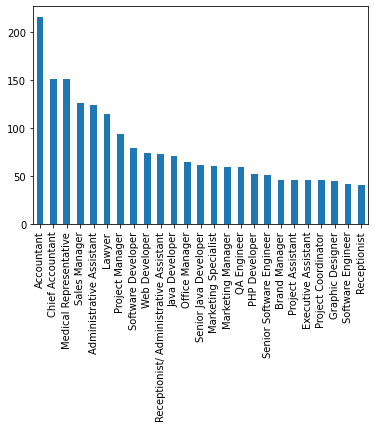

<Figure size 7200x7200 with 0 Axes>

In [11]:
df.Title.value_counts().head(25).plot(kind='bar')
plt.figure(figsize=(100,100))
plt.show()

### No of job post opening per year

In [12]:
q=pd.DataFrame({'Year':pd.to_datetime(df['date']).dt.year,'Title':df['Title']})
q=q.groupby('Year')['Title'].count()
q

Year
2004.0     451
2005.0     555
2006.0     609
2007.0     900
2008.0    1064
2009.0     706
2010.0     893
2011.0    1111
2012.0    1494
2013.0    1387
2014.0    1404
2015.0     917
Name: Title, dtype: int64

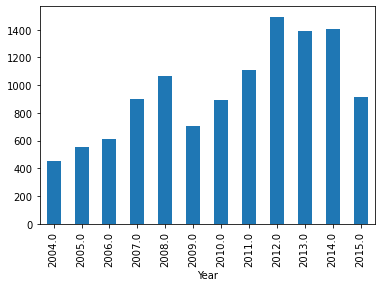

<Figure size 2880x2880 with 0 Axes>

In [13]:
q.plot(kind='bar')
plt.figure(figsize=(40,40))
plt.show()

### Top job post 2004 -2015 

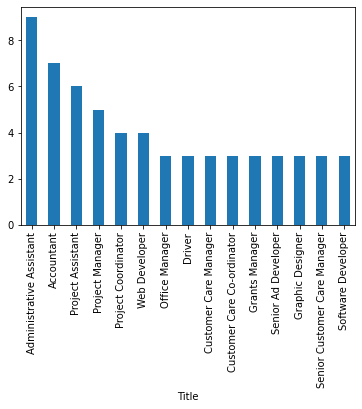

In [14]:
## Year 2004
df[df['date'].dt.year == 2004].groupby('Title')['Title'].count().sort_values(ascending=False).head(15).plot(kind='bar')

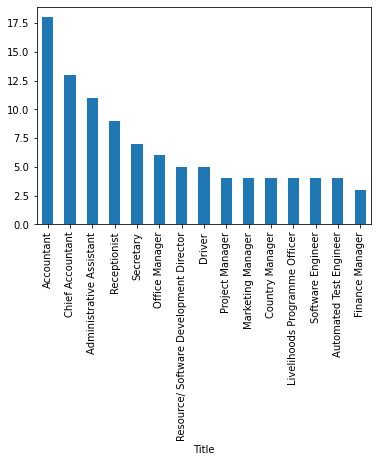

In [15]:
## 2005
df[df['date'].dt.year == 2005].groupby('Title')['Title'].count().sort_values(ascending=False).head(15).plot(kind='bar')

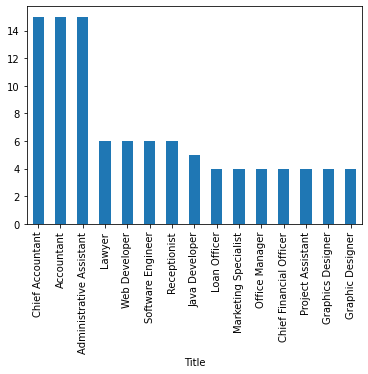

In [16]:
df[df['date'].dt.year == 2006].groupby('Title')['Title'].count().sort_values(ascending=False).head(15).plot(kind='bar')

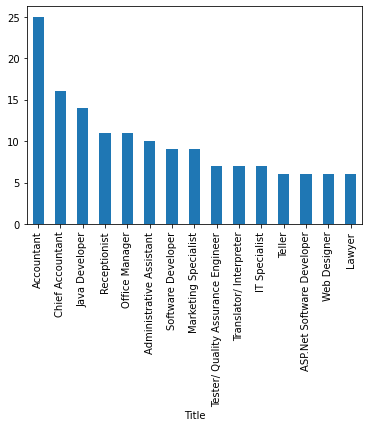

In [17]:
df[df['date'].dt.year == 2007].groupby('Title')['Title'].count().sort_values(ascending=False).head(15).plot(kind='bar')

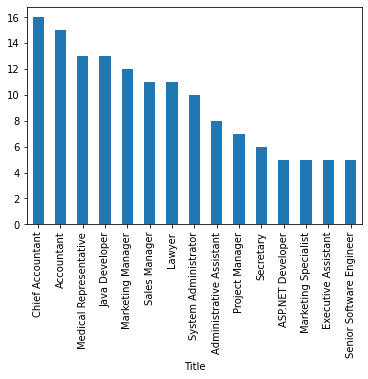

In [18]:
df[df['date'].dt.year == 2008].groupby('Title')['Title'].count().sort_values(ascending=False).head(15).plot(kind='bar')

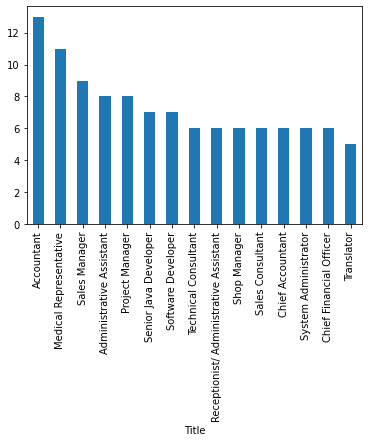

In [19]:
df[df['date'].dt.year == 2009].groupby('Title')['Title'].count().sort_values(ascending=False).head(15).plot(kind='bar')

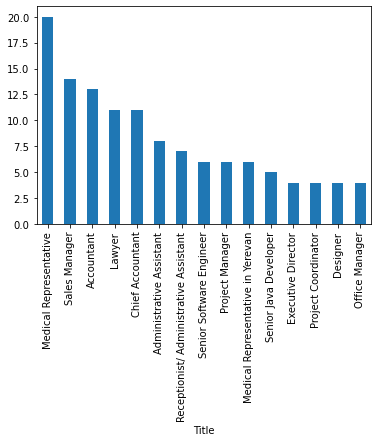

In [20]:
df[df['date'].dt.year == 2010].groupby('Title')['Title'].count().sort_values(ascending=False).head(15).plot(kind='bar')

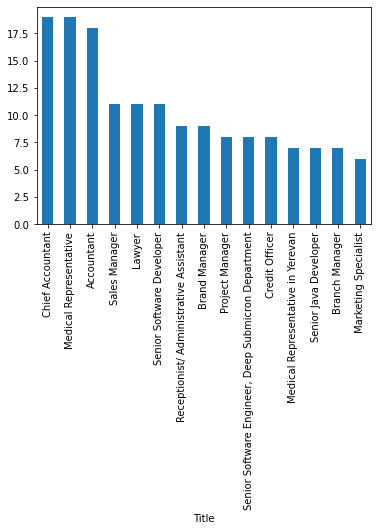

In [21]:
df[df['date'].dt.year == 2011].groupby('Title')['Title'].count().sort_values(ascending=False).head(15).plot(kind='bar')

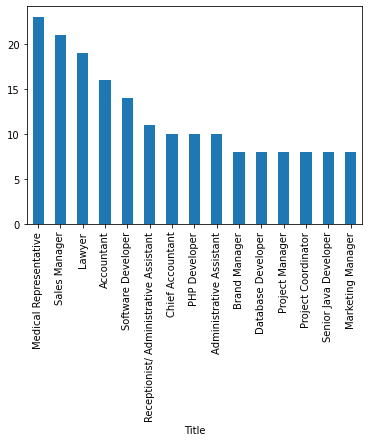

In [22]:
df[df['date'].dt.year == 2012].groupby('Title')['Title'].count().sort_values(ascending=False).head(15).plot(kind='bar')

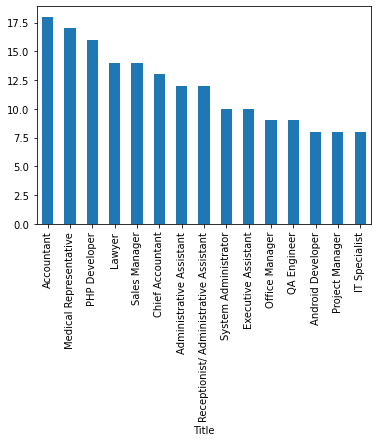

In [23]:
df[df['date'].dt.year == 2013].groupby('Title')['Title'].count().sort_values(ascending=False).head(15).plot(kind='bar')

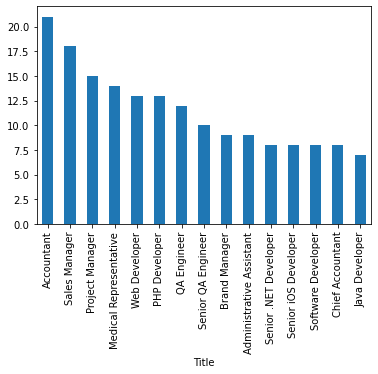

In [24]:
df[df['date'].dt.year == 2014].groupby('Title')['Title'].count().sort_values(ascending=False).head(15).plot(kind='bar')

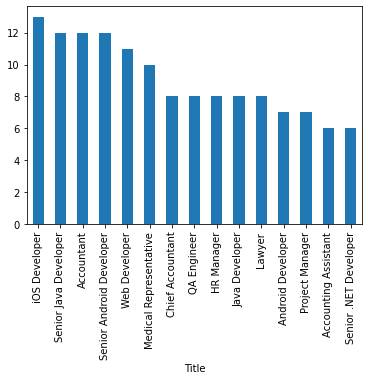

In [25]:
df[df['date'].dt.year == 2015].groupby('Title')['Title'].count().sort_values(ascending=False).head(15).plot(kind='bar')

In [26]:
x=df['RequiredQual']
y=df['IT']

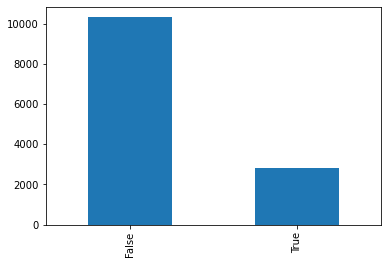

In [27]:
y.value_counts().plot(kind='bar')

### Finding desired characteristics and skillset using Topic modeling

In [28]:
## finding how there are desired characteristics changing over time.
   ### analysing the changes after 5-6 years

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13124 entries, 0 to 19000
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   jobpost         13124 non-null  object        
 1   date            11491 non-null  datetime64[ns]
 2   Title           13124 non-null  object        
 3   Company         13124 non-null  object        
 4   JobDescription  13124 non-null  object        
 5   JobRequirment   13124 non-null  object        
 6   RequiredQual    13124 non-null  object        
 7   IT              13124 non-null  bool          
dtypes: bool(1), datetime64[ns](1), object(6)
memory usage: 833.1+ KB


In [30]:
c=pd.DataFrame(df.loc[(df['date'].dt.year >= 2004) & (df['date'].dt.year <2010),'JobDescription'])

In [31]:
c.reset_index(inplace=True)

In [32]:
corpus =[]
for i in range(0,len(c)):
    review = re.sub(r'\W', ' ', str(c.JobDescription[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'^[a-z]\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)  

In [33]:
corpus[0]

'ameria investment consulting company is seeking a chief financial officer this position manages the company s fiscal and administrative functions provides highly responsible and technically complex staff assistance to the executive director the work performed requires a high level of technical proficiency in financial management and investment management as well as management supervisory and administrative skills '

In [34]:
len(corpus)

4285

In [35]:
lemmatize = WordNetLemmatizer()
for i in range(len(corpus)):
    words =nltk.word_tokenize(corpus[i])
    words=[lemmatize.lemmatize(word) for word in words]
    corpus[i]= ' '.join(words)

In [36]:
len(corpus)

4285

In [37]:
for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words = [word for word in words if word not in stopwords.words('english')]
    corpus[i] = ' '.join(words)

In [38]:
len(corpus)

4285

In [39]:
corpus[0]

'ameria investment consulting company seeking chief financial officer position manages company fiscal administrative function provides highly responsible technically complex staff assistance executive director work performed requires high level technical proficiency financial management investment management well management supervisory administrative skill'

In [40]:
stop_words = ['position','looking','candidate','company','seeking','armenia']

In [41]:
tf=TfidfVectorizer(max_df=.6,stop_words=stop_words)
tf_df = tf.fit_transform(corpus).toarray()

In [42]:
pd.DataFrame(tf_df).shape

(4285, 5632)

In [43]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=4)
lsa.fit(tf_df)
concept_words={}
names=tf.get_feature_names()
for i ,j in enumerate(lsa.components_):
    component_terms = zip(names,j)
    sortedTerms = sorted(component_terms,key=lambda x:x[1],reverse=True)
    sortedTerms = sortedTerms[:20]
    concept_words["Concept "+str(i)] = sortedTerms


In [44]:
concept_words

{'Concept 0': [('project', 0.2571734442228109),
  ('development', 0.19025388415349218),
  ('software', 0.18941918669770227),
  ('responsible', 0.16177233278274608),
  ('manager', 0.15772346590477954),
  ('work', 0.1551774585590202),
  ('incumbent', 0.1476409184241651),
  ('developer', 0.13497664480103835),
  ('team', 0.12652625313492194),
  ('office', 0.1260136621473861),
  ('service', 0.1252564369650346),
  ('system', 0.1230637111354616),
  ('product', 0.12179786873654737),
  ('motivated', 0.11962763146115052),
  ('support', 0.11212870320320789),
  ('highly', 0.10919814635078098),
  ('supervision', 0.10853824235268411),
  ('sale', 0.10731742666927985),
  ('qualified', 0.1060738398776411),
  ('program', 0.10491216418232972)],
 'Concept 1': [('software', 0.3419161805091463),
  ('developer', 0.2820060536820413),
  ('java', 0.20200207535602596),
  ('long', 0.19873814325345152),
  ('term', 0.1922273660105525),
  ('product', 0.18231200896966232),
  ('entail', 0.15227876730684492),
  ('activ

In [45]:
c=pd.DataFrame(df.loc[(df['date'].dt.year >= 2010) & (df['date'].dt.year <2016),'JobDescription'])
c.reset_index(inplace=True)
corpus =[]
for i in range(0,len(c)):
    review = re.sub(r'\W', ' ', str(c.JobDescription[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'^[a-z]\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)  

In [46]:
tf=TfidfVectorizer(max_df=.6,stop_words=stopwords.words('english'))
tf_df = tf.fit_transform(corpus).toarray()

In [47]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=4)
lsa.fit(tf_df)
concept_words={}
names=tf.get_feature_names()
for i ,j in enumerate(lsa.components_):
    component_terms = zip(names,j)
    sortedTerms = sorted(component_terms,key=lambda x:x[1],reverse=True)
    sortedTerms = sortedTerms[:20]
    concept_words["Concept "+str(i)] = sortedTerms

In [48]:
concept_words

{'Concept 0': [('looking', 0.21524819972770054),
  ('development', 0.2071058574803331),
  ('company', 0.20539901427185792),
  ('software', 0.20021592573620725),
  ('responsible', 0.19664501692240388),
  ('incumbent', 0.1839141076988513),
  ('position', 0.1654912042499906),
  ('team', 0.15408346174397647),
  ('seeking', 0.14802291576523),
  ('llc', 0.1467573801521887),
  ('manager', 0.13592107398031886),
  ('developer', 0.13277782772088104),
  ('work', 0.12733183409183885),
  ('project', 0.12576736270228844),
  ('candidate', 0.12214421217288188),
  ('motivated', 0.12049595108171614),
  ('applications', 0.11445245721790372),
  ('sales', 0.11265801893551884),
  ('web', 0.10824595500165639),
  ('cjsc', 0.10795821915036145)],
 'Concept 1': [('software', 0.34982115566840233),
  ('developer', 0.2594965563160414),
  ('web', 0.16684979511821832),
  ('applications', 0.15100112743110453),
  ('senior', 0.14731013028193418),
  ('looking', 0.13793465466010035),
  ('llc', 0.12038306428061797),
  ('de

### IT job classifier and identying the factors 

In [49]:
x = df['Title'].reset_index()

In [50]:
corpus =[]
for i in range(0,len(x.Title)):
    review = re.sub(r'\W', ' ', str(x.Title[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'^[a-z]\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)  

In [51]:
len(corpus)

13124

In [52]:
y=df['IT']

In [53]:
vectorizer = TfidfVectorizer(max_df=.8)
data = vectorizer.fit_transform(corpus).toarray()

In [54]:
mydata =pd.DataFrame(data,columns=vectorizer.get_feature_names())

In [55]:
mydata.shape

(13124, 2285)

In [56]:
mydata.isna().any().value_counts()

False    2285
dtype: int64

In [57]:
mydata['It']=df['IT'].values

In [58]:
trainx,testx,trainy,testy = train_test_split(mydata[mydata.columns.difference(['It'])],mydata['It'],test_size=0.3,random_state=123)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [60]:
RandomForestClassifier()

RandomForestClassifier()

In [61]:
param_grid={'n_estimators':[100,200,300,400,500]}

In [62]:
trainy = trainy.astype('int64').values

In [63]:
#gs = GridSearchCV(RandomForestClassifier(),param_grid,cv=5,n_jobs=-1)
#gs.fit(trainx,trainy)

In [64]:
#gs.best_params_

In [65]:
#gs.best_score_

In [76]:
param_grid={'criterion':['gini','entropy']}
gs = GridSearchCV(RandomForestClassifier(),param_grid,cv=5,n_jobs=-1)
gs.fit(trainx,trainy)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy']})

In [77]:
gs.best_params_

{'criterion': 'gini'}

In [66]:
rf = RandomForestClassifier(100,n_jobs=-1,oob_score=True,random_state=123)
rf.fit(trainx,trainy)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=123)

In [67]:
train_pred=pd.DataFrame({'actual':trainy,'predicted':rf.predict(trainx)})
train_pred

,actual,predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
9181,0,0
9182,0,0
9183,0,0
9184,0,0


In [68]:
testy=testy.astype('int64').values

In [69]:
test_pred=pd.DataFrame({'actual':testy,'predicted':rf.predict(testx)})

In [70]:
test_pred

,actual,predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
3933,0,0
3934,0,0
3935,0,0
3936,0,0


In [71]:
import sklearn.metrics as metrics

In [72]:
metrics.accuracy_score(test_pred.actual,test_pred.predicted)

0.9890807516505841

In [73]:
print(metrics.classification_report(test_pred.actual,test_pred.predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3093
           1       0.99      0.96      0.97       845

    accuracy                           0.99      3938
   macro avg       0.99      0.98      0.98      3938
weighted avg       0.99      0.99      0.99      3938



In [74]:
metrics.confusion_matrix(test_pred.actual,test_pred.predicted)

array([[3086,    7],
       [  36,  809]], dtype=int64)

In [78]:

indices = np.argsort(rf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(trainx.shape[1]):
  feature_rank.loc[f] = [f+1,
                         trainx.columns[indices[f]],
                         rf.feature_importances_[indices[f]]]

<Figure size 7200x2160 with 0 Axes>

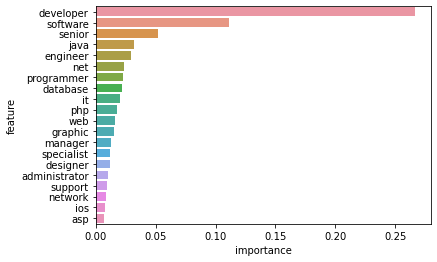

<Figure size 7200x2160 with 0 Axes>

In [84]:
sns.barplot( y = 'feature', x = 'importance', data = feature_rank[:20] )

plt.figure(figsize=(100,30))

### Given a job title, find the 5 top jobs that are of a similar nature, based on the job post.


In [147]:
mydata

,001,07,11,1c,2004,2006,3d,aacas,abap,abatement,...,young,youth,zang,zend,zend2,zonal,zone,zooplankton,zvartnots,It
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
13120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [148]:
df

,jobpost,date,Title,Company,JobDescription,JobRequirment,RequiredQual,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,2004-01-05,Chief Financial Officer,AMERIA Investment Consulting Company,AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,2004-01-07,Country Coordinator,Caucasus Environmental NGO Network (CENN),Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,2004-01-07,BCC Specialist,Manoff Group,The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",False
13,Food Security Regional Cooperation and Stabili...,2004-01-14,"Community Development, Capacity Building and C...",Food Security Regional Cooperation and Stabili...,Food Security Regional Cooperation and Stabili...,- Assist the Tavush Marz communities and commu...,- Higher Education and/or professional experie...,False
17,"United Nations Development Programme, Armenia\...",2004-01-15,Country Economist (NOB),"United Nations Development Programme, Armenia",The United Nations Development Programme in Ar...,The incumbent under direct supervision of UNDP...,- Minimum Masters Degree in Economics;\n- Mini...,False
...,...,...,...,...,...,...,...,...
18992,Macadamian AR CJSC\n\n\nTITLE: .NET Developer...,2015-12-25,.NET Developer,Macadamian AR CJSC,The incumbent will develop software applicatio...,- Participate in all the steps of the software...,- 2 - 5 years of experience in software develo...,True
18995,"""Transport PIU"" State Institution of the RA Mi...",2015-12-24,Deputy Director,"""Transport PIU"" State Institution of the RA Mi...",The incumbent will be responsible for supporti...,- Support the Director in organizing the activ...,"- University degree in Civil Engineering, Econ...",False
18996,Technolinguistics NGO\n\n\nTITLE: Senior Crea...,2015-12-28,Senior Creative UX/ UI Designer,Technolinguistics NGO,A tech startup of Technolinguistics based in N...,- Work closely with product and business teams...,- At least 5 years of experience in Interface/...,False
18999,San Lazzaro LLC\n\n\nTITLE: Head of Online ...,2015-12-30,Head of Online Sales Department,San Lazzaro LLC,San Lazzaro LLC is looking for a well-experien...,- Handle the project activites of the online s...,- At least 1 year of experience in online sale...,False


In [162]:
from sklearn.cluster import KMeans

In [163]:
errors =[]
for i in range(1,21):
    km=KMeans(i)
    km=km.fit(mydata)
    errors.append(km.inertia_)
    

In [164]:
errors

[15042.040679735432,
 12562.490532200249,
 12295.994677039871,
 11980.227038736779,
 11781.165440572146,
 11644.806447293531,
 11465.698142747342,
 11289.779385714757,
 11168.152776479224,
 11106.608673727731,
 10912.888837376988,
 10818.543276484923,
 10698.970922750286,
 10622.81761533194,
 10569.702375565006,
 10448.276911289418,
 10469.981328843807,
 10250.726870931996,
 10288.763879913888,
 10162.20953034635]

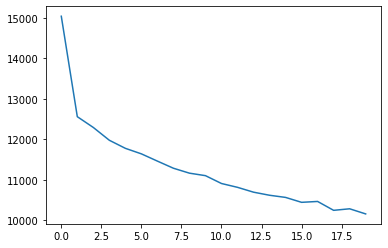

In [167]:
pd.Series(errors).plot()

In [169]:
score=[]
for i in range(2,21):
    km=KMeans(i)
    km=km.fit(mydata)
    score.append(metrics.silhouette_score(mydata,km.labels_))

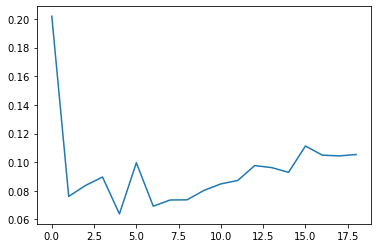

In [171]:
pd.Series(score).plot()

In [173]:
km_5=KMeans(5)
km_5=km_5.fit(mydata)
km_5.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [176]:
mydata['clusters']=km_5.labels_

In [179]:
mydata['clusters'].value_counts()

1    7118
0    2803
3    1730
2     988
4     485
Name: clusters, dtype: int64

In [181]:
df['clusters'] =km_5.labels_

In [182]:
df

,jobpost,date,Title,Company,JobDescription,JobRequirment,RequiredQual,IT,clusters
0,AMERIA Investment Consulting Company\nJOB TITL...,2004-01-05,Chief Financial Officer,AMERIA Investment Consulting Company,AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",False,1
2,Caucasus Environmental NGO Network (CENN)\nJOB...,2004-01-07,Country Coordinator,Caucasus Environmental NGO Network (CENN),Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",False,1
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,2004-01-07,BCC Specialist,Manoff Group,The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",False,1
13,Food Security Regional Cooperation and Stabili...,2004-01-14,"Community Development, Capacity Building and C...",Food Security Regional Cooperation and Stabili...,Food Security Regional Cooperation and Stabili...,- Assist the Tavush Marz communities and commu...,- Higher Education and/or professional experie...,False,1
17,"United Nations Development Programme, Armenia\...",2004-01-15,Country Economist (NOB),"United Nations Development Programme, Armenia",The United Nations Development Programme in Ar...,The incumbent under direct supervision of UNDP...,- Minimum Masters Degree in Economics;\n- Mini...,False,1
...,...,...,...,...,...,...,...,...,...
18992,Macadamian AR CJSC\n\n\nTITLE: .NET Developer...,2015-12-25,.NET Developer,Macadamian AR CJSC,The incumbent will develop software applicatio...,- Participate in all the steps of the software...,- 2 - 5 years of experience in software develo...,True,0
18995,"""Transport PIU"" State Institution of the RA Mi...",2015-12-24,Deputy Director,"""Transport PIU"" State Institution of the RA Mi...",The incumbent will be responsible for supporti...,- Support the Director in organizing the activ...,"- University degree in Civil Engineering, Econ...",False,1
18996,Technolinguistics NGO\n\n\nTITLE: Senior Crea...,2015-12-28,Senior Creative UX/ UI Designer,Technolinguistics NGO,A tech startup of Technolinguistics based in N...,- Work closely with product and business teams...,- At least 5 years of experience in Interface/...,False,1
18999,San Lazzaro LLC\n\n\nTITLE: Head of Online ...,2015-12-30,Head of Online Sales Department,San Lazzaro LLC,San Lazzaro LLC is looking for a well-experien...,- Handle the project activites of the online s...,- At least 1 year of experience in online sale...,False,1


In [248]:
h=[]
h=input('Enter  Job Title :')

Enter  Job Title :.NET Developer


In [235]:
df2=df.copy()

In [249]:
def myfunc(h):
    u=df['Title'].apply(lambda x : 1 if x in h else 0)
    return list(u)
df2['id']=myfunc(h)
    

In [252]:
df2.loc[df2['id'] ==1,['jobpost','clusters']].head(5)

,jobpost,clusters
3764,Toto International Bookmakers\nTITLE: .NET De...,0
4093,Damaris AM Ltd.\nTITLE: Developer\nANNOUNCEME...,0
4283,IOGenic\nTITLE: .NET Developer\nANNOUNCEMENT ...,0
6610,Energize Global Services CJSC\nTITLE: Develop...,0
10239,"Firmplace Corporation, Yerevan branch\nTITLE: ...",0
